In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import stock_module as sm
import random
import os
import datetime
import time

In [1867]:
sm.filter_financials(["turnover", "equity"], 12, 3, 5)

Reference year to move back: 2014/12
Reference year to move back: 2014/12


['AKMGY',
 'LKMNH',
 'LOGO',
 'TDGYO',
 'MAVI',
 'SODA',
 'GENTS',
 'TLMAN',
 'YAPRK',
 'TRGYO',
 'EGPRO',
 'ALCAR',
 'ALKIM',
 'YONGA',
 'UFUK',
 'SNKRN',
 'BRISA',
 'JANTS',
 'YBTAS',
 'EGSER',
 'TIRE',
 'YGGYO',
 'TMPOL',
 'KAREL',
 'ULUUN',
 'DYOBY',
 'VERTU',
 'RTALB',
 'DAGHL',
 'ROYAL',
 'TURGG',
 'OLMIP',
 'UMPAS',
 'SAFKR',
 'EREGL',
 'KFEIN',
 'AKGUV',
 'BOLUC',
 'AKCNS',
 'BASCM',
 'BTCIM',
 'ARMDA',
 'ADEL',
 'SANKO',
 'SONME',
 'OZRDN',
 'CEOEM',
 'BLCYT',
 'BIMAS',
 'ARENA',
 'ASLAN',
 'ARCLK',
 'KSTUR',
 'GSDDE',
 'NUHCM',
 'HDFGS',
 'ANACM',
 'NTHOL',
 'YAYLA',
 'CIMSA',
 'POLHO',
 'BNTAS',
 'DERAS',
 'SARKY',
 'BAKAB',
 'FORMT',
 'IZFAS',
 'ASELS',
 'ENJSA',
 'PEKGY',
 'ERBOS',
 'YKSLN',
 'DGGYO',
 'SOKM',
 'SEYKM',
 'BERA',
 'CMENT',
 'MPARK',
 'CCOLA',
 'EMKEL',
 'NATEN',
 'PETUN',
 'ENKAI',
 'KRDMD',
 'PGSUS',
 'BRYAT',
 'KRDMB',
 'KUTPO',
 'PAGYO',
 'EGCYH',
 'IZTAR',
 'YUNSA',
 'SISE',
 'KRDMA',
 'TCELL',
 'SMART',
 'MSGYO',
 'THYAO',
 'TBORG']

In [1989]:
BIST50 = ["TUPRS", "VAKBN","TOASO","KRDMD","MGROS","DOHOL","AKBNK","TKFEN","FROTO","GARAN","KOZAA","HALKB",
         "KORDS","TCELL","ENKAI","KOZAL","VESTL","TSKB","YKBNK","SODA","TTKOM","SKBNK","BIMAS","ODAS","PETKM",
          "SISE","ANACM", "ARCLK", "YATAS", "EREGL", "SASA", "ALARK", "SAHOL", "AEFES", "EKGYO", "THYAO",
         "HEKTS", "PGSUS", "ISCTR", "TRKCM", "KCHOL", "ISFIN", "ASELS", "TAVHL","IPEKE","ULKER","CCOLA",
         "GUBRF","AGHOL", "ENJSA"]

In [1006]:
frames = pd.read_pickle("frames_whole")

In [2027]:
stock_name = "ULKER"

In [2028]:
frame = frames.loc[frames["stock_name"] == stock_name]

In [2029]:
frame = frame.loc[frame.index > "01-04-2015"]
frame = frame.loc[frame.index < "01-04-2018"]

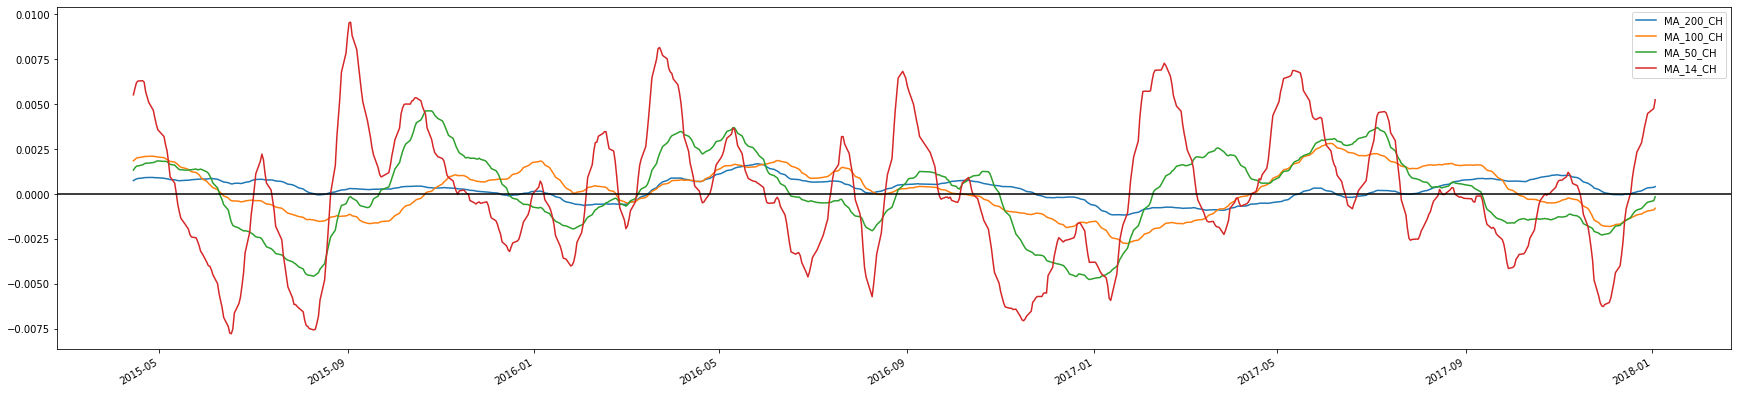

In [2030]:
frame[["MA_200_CH", "MA_100_CH", "MA_50_CH", "MA_14_CH"]].plot(figsize=(30,7))
plt.axhline(0, color="black")

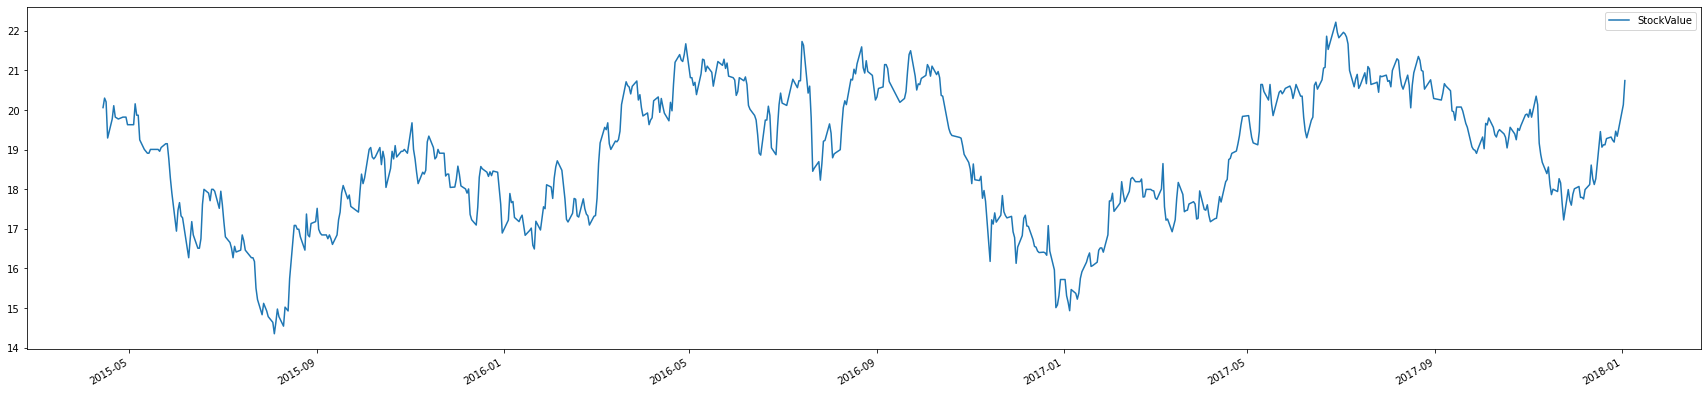

In [2031]:
frame[["StockValue"]].plot(figsize=(30,7))
# plt.axvline(frame.iloc[425:,:].index[0], color="black")

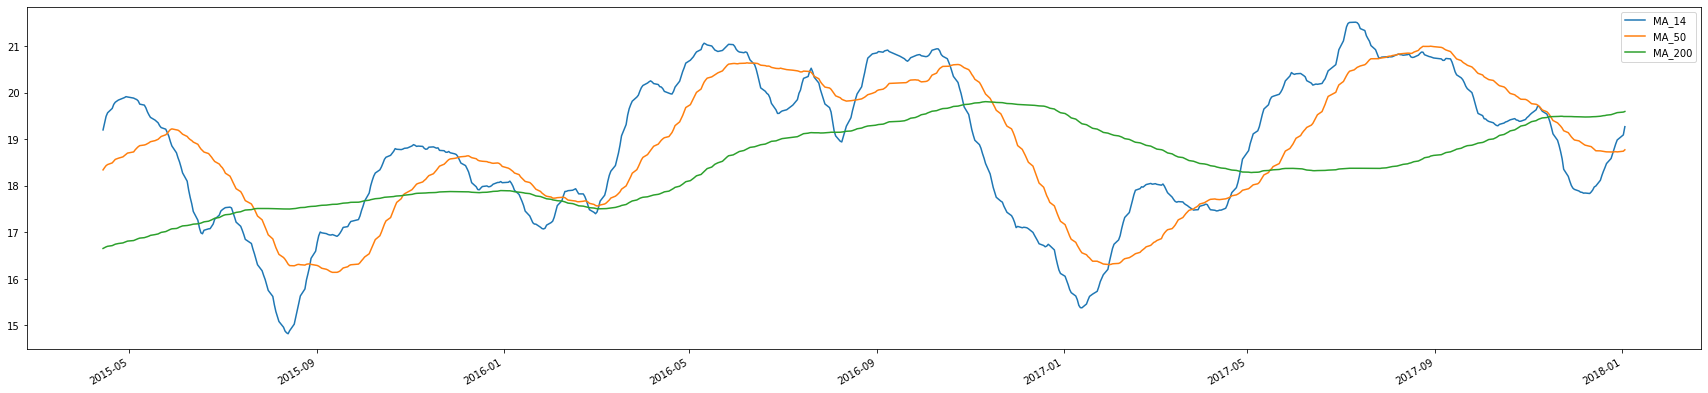

In [2032]:
frame[["MA_14", "MA_50", "MA_200"]].plot(figsize=(30,7))
# plt.axvline(frame.iloc[9:,:].index[0], color="black")
# plt.axvline(frame.iloc[29:,:].index[0], color="black")

In [2046]:
# MA_100_CH 0'dan büyük ve MA_14_CH de -0.05'ten büyükse
frame['day'] = np.where((frame['MA_200_CH'] > -0.001) &
                        (frame['MA_100_CH'] > -0.002) &
                        (frame['MA_50_CH'] > -0.003) &
                        (frame['MA_14_CH'] > -0.004) &
                        (frame['MA_14'] > frame['MA_100']) &
                        (frame['MA_50'] > frame['MA_200']) &
                        (frame['RSI'] > 35) &
                        (frame['market_positive_ma_10'] > 0.50) &
                        (frame['marketV_to_bookV'] < 5)
                        , "BUY", "SELL")

In [2047]:
locations = []
start = 0
for row in range(frame.shape[0]-1):
    if frame.day[row] == "BUY":
        mode = "BUY"
        if (frame.day[row] == "BUY" and frame.day[row+1] == "SELL"):
            end = row
            loc = [start, end]
            locations.append(loc)

    else:
        mode = "SELL"
        if (frame.day[row] == "SELL" and frame.day[row+1] == "BUY"):
            start = row+1

In [2048]:
locations

[[178, 179],
 [228, 232],
 [234, 237],
 [239, 262],
 [290, 290],
 [314, 319],
 [354, 354],
 [359, 361],
 [363, 373],
 [376, 376],
 [527, 528],
 [531, 531],
 [533, 540],
 [559, 559],
 [563, 566],
 [568, 568],
 [570, 571],
 [576, 584],
 [600, 600],
 [605, 605]]

In [2049]:
total = 0
for obs in locations:
    total += obs[1] - obs[0]
print(f"total transaction day: {total}")
print(f"total day            : {frame.shape[0]}")

total transaction day: 68
total day            : 687


In [2050]:
rets = []
for obs in locations:
    ret = (frame.StockValue[obs[1]] - frame.StockValue[obs[0]]) / frame.StockValue[obs[0]]
    rets.append(ret)
    print(ret)

-0.02184290868720508
-0.024390863718145535
0.05917530646006503
0.04201952481768987
0.0
-0.045026016424827155
0.0
0.025044825086788906
0.022771721901138953
0.0
-0.023809177796185615
0.0
-0.005765547433842715
0.0
-0.0019140708497695825
0.0
-0.0027968050058069754
0.018849834129130005
0.0
0.0


In [2051]:
rets = [ret + 1 for ret in rets]

In [2052]:
retur = 1
for ret in rets:
    retur = retur * ret
retur

1.0378308636047682

In [1856]:
frame.iloc[615:621,:]

,MA_7,MA_7_CH,MA_14,MA_14_CH,MA_20,MA_20_CH,MA_50,MA_50_CH,MA_100,MA_100_CH,...,RSI,Drawdown,marketV_to_bookV,StockValue,market_positive,market_positive_ma_10,stock_name,volume,volume_ma_14,day
2017-09-25,9.459771,0.001142,9.460357,0.000291,9.416030,-0.001267,9.719614,-0.000611,9.771791,-0.000879,...,48.966483,-0.197363,2.04606,9.2959,0.082667,0.318594,AKCNS,2115630.0,1.683423e+06,SELL
2017-09-26,9.423871,0.000789,9.460357,0.000555,9.421890,-0.000963,9.709062,-0.000662,9.762579,-0.000861,...,50.000000,-0.190861,2.06265,9.3712,0.906849,0.360767,AKCNS,989913.0,1.652755e+06,SELL
2017-09-27,9.392771,0.000461,9.457371,0.000737,9.422730,-0.000675,9.695664,-0.000720,9.752865,-0.000845,...,48.368717,-0.197363,2.04606,9.2959,0.159341,0.341008,AKCNS,617752.0,1.629773e+06,SELL
2017-09-28,9.367643,0.000206,9.454979,0.000901,9.421055,-0.000427,9.679920,-0.000790,9.743318,-0.000838,...,48.701047,-0.196646,2.04791,9.3042,0.872159,0.398759,AKCNS,1915079.0,1.645718e+06,SELL
2017-09-29,9.340129,-0.000104,9.447800,0.000847,9.420220,-0.000231,9.665516,-0.000855,9.734106,-0.000842,...,45.889571,-0.194471,2.05344,9.3294,0.633846,0.409291,AKCNS,1067875.0,1.623979e+06,SELL
2017-10-02,9.352100,-0.000369,9.432850,0.000547,9.426505,-0.000114,9.653458,-0.000928,9.729417,-0.000836,...,40.603394,-0.182901,2.01482,9.4634,0.797688,0.474857,AKCNS,1438621.0,1.476854e+06,SELL


---
### FUNCTION

In [445]:
def get_frame(frames, stock_name, start_date, end_date):
    frame = frames.loc[frames["stock_name"] == stock_name]
    frame = frame.loc[frame.index > start_date]
    frame = frame.loc[frame.index < end_date]
    return frame

In [2261]:
def frame_rules(frame):
    # MA_100_CH 0'dan büyük ve MA_14_CH de -0.05'ten büyükse
    frame['day'] = np.where((frame['MA_200_CH'] > 0.000) &
                            (frame['MA_100_CH'] > -0.001) &
                            (frame['MA_50_CH'] > -0.002) &
                            (frame['MA_14_CH'] > -0.003) &
                            (frame['MA_14'] > frame['MA_100']) &
                            (frame['MA_50'] > frame['MA_200']) &
                            (frame['RSI'] > 35) &
                            (frame['market_positive_ma_10'] > 0.40) &
                            (frame['marketV_to_bookV'] < 3)
                            , "BUY", "SELL")
    
    return frame

In [2262]:
def get_return(frame):
    locations = []
    start = 0
    for row in range(frame.shape[0]-1):
        if frame.day[row] == "BUY":
            mode = "BUY"
            if (frame.day[row] == "BUY" and frame.day[row+1] == "SELL"):
                end = row
                loc = [start, end]
                locations.append(loc)

        else:
            mode = "SELL"
            if (frame.day[row] == "SELL" and frame.day[row+1] == "BUY"):
                start = row+1

    total = 0
    for obs in locations:
        total += obs[1] - obs[0]
    # print(f"total transaction day: {total}")
    # print(f"total day            : {frame.shape[0]}")

    rets = []
    for obs in locations:
        ret = (frame.StockValue[obs[1]] - frame.StockValue[obs[0]]) / frame.StockValue[obs[0]]
        rets.append(ret)
    #     print(ret)

    rets = [ret + 1 for ret in rets]

    retur = 1
    for ret in rets:
        retur = retur * ret
        
    result = {"return": retur, "duration": total, "total_day": frame.shape[0], "locations": locations}
        
    return result

In [2263]:
def produce_frame(frames, stock_name, start_date, end_date):
    frame = get_frame(frames, stock_name, start_date, end_date)
    frame = frame_rules(frame)
    result = get_return(frame)
    ret = result["return"]
    duration = result["duration"]
    total_day = result["total_day"]
    locations = result["locations"]
    
    dict_ = {"stock_name": stock_name, "ret": ret, "duration": duration, 
             "total_day": total_day, "locations": locations}
    
    return dict_

In [2264]:
frames = pd.read_pickle("frames_whole")

In [2447]:
stock_name = "TAVHL"
start_date = "01-01-2016"
end_date = "01-06-2017"

In [2446]:
produce_frame(frames, stock_name, start_date, end_date)

{'stock_name': 'TAVHL',
 'ret': 1,
 'duration': 0,
 'total_day': 255,
 'locations': []}

In [2422]:
sum([i[1] - i[0] for i in produce_frame(frames, stock_name, start_date, end_date)["locations"]])

111

In [2423]:
stock_list = list(set(frames["stock_name"]))

In [2424]:
stock_list = sm.filter_financials(["turnover", "roe"], 12, 3, 5)

Reference year to move back: 2014/12
Reference year to move back: 2014/12


In [2425]:
stock_list = BIST50

In [2448]:
len(stock_list)

50

In [2449]:
results = []
for stock_name in stock_list:
    results.append(produce_frame(frames, stock_name, start_date, end_date))
results = pd.DataFrame(results)

In [2450]:
third = results.sort_values(by=["ret"], ascending=False)

In [2451]:
third["duration"].sum()

2171

In [2452]:
third["ret"] = third["ret"].replace(1, np.NaN)
third["ret"].mean()

1.126693116274574

In [2453]:
third["ret"] = third["ret"].replace(1, np.NaN)
third["ret"].median()

1.0978439906844932

In [2454]:
third["ret"].std()

0.1838558771954602

In [2455]:
third["duration"] = third["duration"].replace(0, np.NaN)
third["duration"].mean()

77.53571428571429

In [2456]:
third.iloc[:200,:]

,stock_name,ret,duration,total_day,locations
12,KORDS,1.451212,134.0,255,"[[5, 10], [44, 85], [90, 90], [96, 113], [116,..."
24,PETKM,1.407025,156.0,255,"[[0, 2], [5, 28], [35, 85], [90, 90], [96, 109..."
36,HEKTS,1.399091,124.0,255,"[[0, 2], [5, 14], [45, 85], [90, 90], [96, 103..."
39,TRKCM,1.374197,141.0,255,"[[90, 90], [96, 113], [116, 167], [169, 169], ..."
30,SASA,1.358338,58.0,255,"[[76, 85], [90, 90], [96, 113], [116, 126], [1..."
28,YATAS,1.338389,175.0,255,"[[0, 2], [5, 28], [35, 57], [60, 60], [62, 85]..."
16,VESTL,1.284937,95.0,255,"[[53, 85], [90, 90], [108, 113], [116, 174], [..."
10,KOZAA,1.280420,48.0,255,"[[187, 209], [212, 219], [225, 226], [231, 249]]"
44,IPEKE,1.240705,43.0,255,"[[189, 209], [212, 217], [231, 249]]"
27,ARCLK,1.215613,132.0,255,"[[24, 28], [32, 32], [35, 85], [90, 90], [96, ..."


Momentum hesapla! ve entegre et.

---

---